In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pyplot
import pandas as pd
import random
import plotly.express as px

In [9]:
apiName = '212-GET-DELIVERED-GROUP-V2_Failed'
prefix = 'normal' #normal or alert

data = pd.read_csv('data/%s' %(apiName))
seasonal = pd.read_csv('%s/result_seasonal/%s_Seasonal' %(prefix,apiName))
residual = pd.read_csv('%s/result_residual/%s_Residual' %(prefix,apiName))
threshold = pd.read_csv('%s/threshold/%s_threshold' %(prefix,apiName))

In [10]:
ts = data['TS'].values

dataValues = data['Value'].values
dataSeasonal = seasonal['Value'].values
dataResidual = residual['Value'].values

fig = px.line(dataValues, x = ts, y = dataValues, title='Origin data')
fig.show()

fig = px.line(dataSeasonal, x = ts, y = dataSeasonal, title='Seasonal')
fig.show()

fig = px.line(dataResidual, x = ts, y = dataResidual, title='Residual')
fig.show()

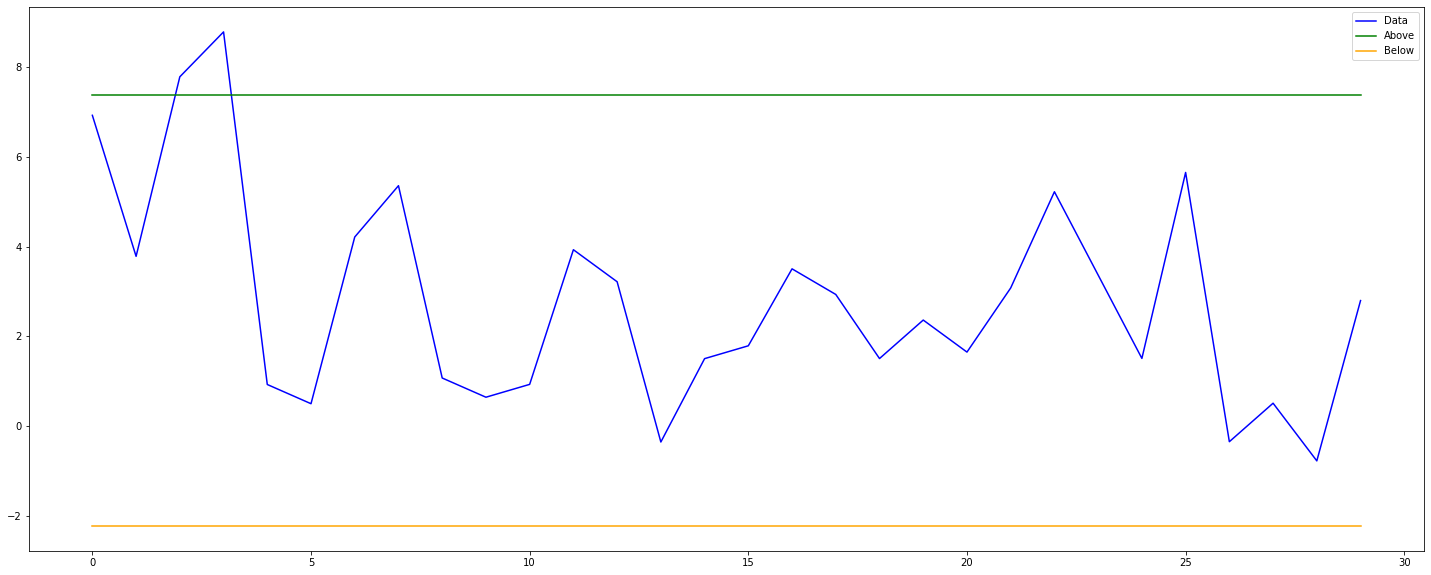

In [11]:
windowSize = 30

dataValues30m = dataValues[-windowSize:]
dataSeasonal30m = dataSeasonal[-windowSize:]
dataResidual30m = dataResidual[-windowSize:]

low = threshold['low'].values[0]
high = threshold['high'].values[0]

belowArr = np.full((np.abs(windowSize)), low)
aboveArr = np.full((np.abs(windowSize)), high)

fig, ax = pyplot.subplots()
fig.set_figwidth(25)
fig.set_figheight(10)

ax.plot(pd.Series(dataResidual30m).index, dataResidual30m, color="blue", label = "Data")
ax.plot(pd.Series(aboveArr).index, aboveArr, color="green", label = "Above")
ax.plot(pd.Series(belowArr).index, belowArr, color="orange", label = "Below")

pyplot.legend(loc="best")
pyplot.show()